

---



* 수정자: 한양대ERICA, 산업경영공학과, 오요셉(yosepoh@hanyang.ac.kr)
* 마지막 수정일: 2023.05.23
* 원본 코드: 오일석, 이진선, [파이썬으로 만드는 인공지능], 한빛아카데미

---



# (1) Preliminaries

In [ ]:
# 데이터 전처리 패키지
import numpy as np 
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt   

# 머신러닝 패키지 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# (2) Load the dataset 

데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


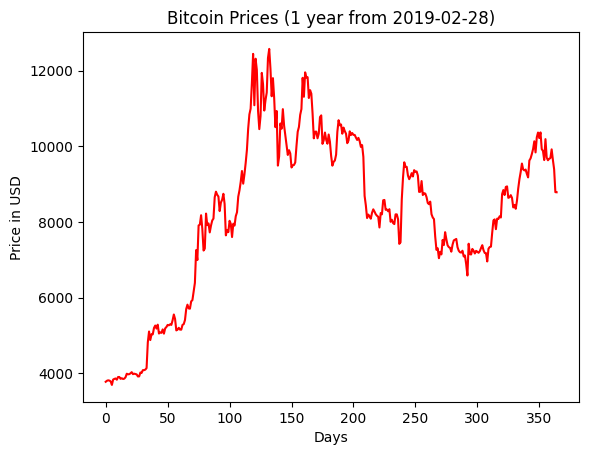

In [ ]:
# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
# 단일 예측이므로 [[]]를 사용하여 저장함
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함
# 다중예측(종가, 시가, 고가, 저가)을 할 경우 아래 코드 사용
# seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)', '24h Low (USD)']].to_numpy() # 종가만 취함
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# 그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

In [ ]:
# 데이터 전처리 
def seq2dataset(seq,window,horizon):  # 시계열 데이터를 윈도우 단위로 자르는 함수
    X=[]
    Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

# 이걸로 몇개로 미래를 예측할지 정함
# 7개로 미래 예측
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
# 샘플로 잘 뽑혔는지 확인
print(X[0],Y[0])
print(X[-1],Y[-1]) 

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [ ]:
# 윈도우 사이즈때문에 앞쪽 7개가 하나로 돼 365->358로 됨
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]
y_train=Y[0:split]
x_test=X[split:]
y_test=Y[split:]

# 훈련 세트와 테스트 세트가 잘 분할되었는지 확인
print('train 데이터 수: ', len(x_train))
print('test 데이터 수: ', len(x_test))

train 데이터 수:  250
test 데이터 수:  108


# (3) Build the model

In [ ]:
# 모델 정의: LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
# 이 문제가 회귀 문제이기때문에 output노드가 1개임
# 아웃풋 노드의 activation function은 디폴트값인 linear 임
model.add(Dense(1))
# 다중 예측일 경우 아래코드 사용
# model.add(Dense(4))
model.summary()

# 최적화 함수 정의하기
model.compile(loss='mae',optimizer='adam',metrics=['mae'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


# (4) Training

In [ ]:
%%time 
# 200 epoch에 대한 훈련을 실행하고 진행 과정 기록
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 8s 8ms/step - loss: 3920.8594 - mae: 3920.8594 - val_loss: 6753.1265 - val_mae: 6753.1265
Epoch 2/200
200/200 [==============================] - 1s 7ms/step - loss: 2473.7776 - mae: 2473.7776 - val_loss: 435.2339 - val_mae: 435.2339
Epoch 3/200
200/200 [==============================] - 1s 7ms/step - loss: 485.8661 - mae: 485.8661 - val_loss: 405.0965 - val_mae: 405.0965
Epoch 4/200
200/200 [==============================] - 2s 8ms/step - loss: 458.4538 - mae: 458.4538 - val_loss: 731.2159 - val_mae: 731.2159
Epoch 5/200
200/200 [==============================] - 2s 11ms/step - loss: 443.9636 - mae: 443.9636 - val_loss: 420.0845 - val_mae: 420.0845
Epoch 6/200
200/200 [==============================] - 1s 7ms/step - loss: 477.2445 - mae: 477.2445 - val_loss: 1185.6591 - val_mae: 1185.6591
Epoch 7/200
200/200 [==============================] - 1s 7ms/step - loss: 475.7857 - mae: 475.7857 - val_loss: 405.6180 - val_mae: 405.6180
Epoc

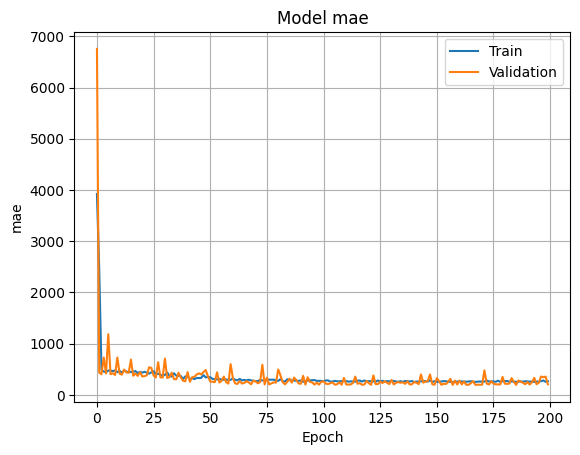

In [ ]:
# 훈련과정 시각화

# 초반 에러가 아주커서 오버피팅 낫는지 그래프를 볼 수 없어서 ylim 걸어야함 
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch') 
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# (5) Evaluation

In [ ]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("MAPE:",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 180.48153686523438 MAE: 180.48153686523438
4/4 [==============================] - 0s 4ms/step
MAPE: [0.02156392]


- 2%의 오차가 나오는게 좋은 것인가 좋지 않은 것인가 판단은 우리가 함
- 이 오차율 하나만 가지고 판단하기는 어려움

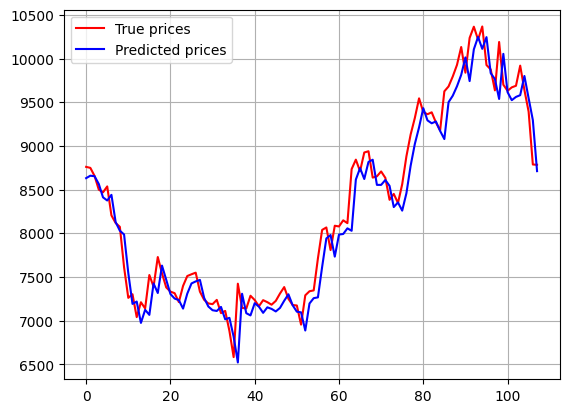

In [ ]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

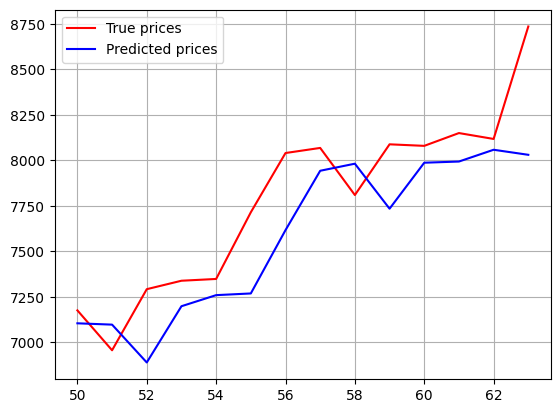

In [ ]:
# 일부 구간을 확대하여 시각화
# 완벽한 것 같지만 50~62사이 이런식으로 확대를해서 보면 애매함
# 형상이 맞느냐 안맞느냐를 보는게 아니라 내일 오르냐 내리냐를 분석하는게 더 좋음 
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

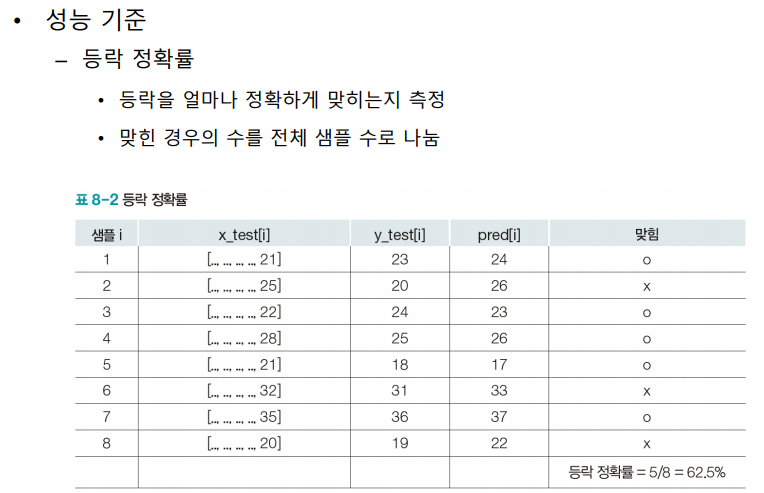

- 투자는 판단의 몫임